<a href="https://colab.research.google.com/github/Shawuor/PREDICTIVE-MAINTENANCE---PYTHON/blob/main/Predictive_Maintenance_(Failure_or_No_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Binary Classification (failure or no Failure)**

Target : Failure or Not

In [ ]:
## Importing necesarry packages
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving predictive_maintenance.csv to predictive_maintenance.csv


1).UDI (Unique Identifier): This is a unique identifier for each data point, which suggests that each data point corresponds to a specific event or observation in a manufacturing process. Each UID could be associated with a specific machine operation or event.
    
2).productID: This feature represents the product quality variants (low, medium, or high) and includes a variant-specific serial number. This may indicate different product types or variations produced by the machines.
    
3).air temperature [K]: This feature represents the air temperature in Kelvin, which could be a parameter relevant to the manufacturing process, potentially indicating the environmental conditions or settings of the machines.
    
4).process temperature [K]: This feature is related to the process temperature in Kelvin, which is generated using a random walk process and normalized. It may be a critical parameter in the manufacturing process, affecting product quality and machine operation.
    
5).rotational speed [rpm]: This feature represents the rotational speed of the machines, which is calculated based on power and includes normally distributed noise. It is an essential parameter for understanding machine operation.
    
6).torque [Nm]: Torque values are normally distributed around 40 Nm with specific characteristics. This feature likely indicates the torque applied by the machines during the manufacturing process.
    
7).tool wear [min]: The tool wear feature is associated with the quality variants (H/M/L) and adds minutes of tool wear to the used tool in the process. It suggests that tools are used in conjunction with the machines during the manufacturing process.
    
8).'machine failure' label: This label indicates whether the machine has failed in a particular data point for any of the specified failure modes. This suggests that the dataset includes information about machine failures, and the dataset may include different types of machines with different failure modes.

#The machine failure consists of five independent failure modes

tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 â€“ 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).

heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the toolâ€™s rotational speed is below 1380 rpm. This is the case for 115 data points.

power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.

overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.

random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.

If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail

In [ ]:
df=pd.read_csv('predictive_maintenance.csv')

## Exploratory Data Analysis


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
df["Target"].value_counts()

0    9661
1     339
Name: Target, dtype: int64

In [ ]:
df["Failure Type"].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [ ]:
# Get instances where'Target' is 0 but Failure type is not "No Failure"
selected_instances = df[(df['Target'] == 0) & (df['Failure Type'] != 'No Failure')]
selected_instances

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1221,1222,M16081,M,297.0,308.3,1399,46.4,132,0,Random Failures
1302,1303,L48482,L,298.6,309.8,1505,45.7,144,0,Random Failures
1748,1749,H31162,H,298.4,307.7,1626,31.1,166,0,Random Failures
2072,2073,L49252,L,299.6,309.5,1570,35.5,189,0,Random Failures
2559,2560,L49739,L,299.3,309.0,1447,50.4,140,0,Random Failures
3065,3066,M17925,M,300.1,309.2,1687,27.7,95,0,Random Failures
3452,3453,H32866,H,301.6,310.5,1602,32.3,2,0,Random Failures
5471,5472,L52651,L,302.7,312.3,1346,61.2,170,0,Random Failures
5489,5490,L52669,L,302.6,312.1,1499,35.0,215,0,Random Failures
5495,5496,H34909,H,302.9,312.5,1357,55.0,12,0,Random Failures


In [ ]:
# Get instances where'Target' is 0 but Failure type is not "No Failure"
selected_instances1 = df[(df['Target'] == 1) & (df['Failure Type'] == 'No Failure')]
selected_instances1

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1437,1438,H30851,H,298.8,309.9,1439,45.2,40,1,No Failure
2749,2750,M17609,M,299.7,309.2,1685,28.9,179,1,No Failure
4044,4045,M18904,M,301.9,310.9,1419,47.7,20,1,No Failure
4684,4685,M19544,M,303.6,311.8,1421,44.8,101,1,No Failure
5536,5537,M20396,M,302.3,311.8,1363,54.0,119,1,No Failure
5941,5942,L53121,L,300.6,310.7,1438,48.5,78,1,No Failure
6478,6479,L53658,L,300.5,309.8,1663,29.1,145,1,No Failure
8506,8507,L55686,L,298.4,309.6,1710,27.3,163,1,No Failure
9015,9016,L56195,L,297.2,308.1,1431,49.7,210,1,No Failure


In [ ]:
# Change the values in 'Target' from 0 to 1 where 'Failure_Type' is 'random'
df.loc[df['Failure Type'] == 'Random Failures', 'Target'] = 1
df.loc[df['Failure Type'] == 'No Failure', 'Target'] = 0

In [ ]:
selected_instances1 = df[(df['Target'] == 1) & (df['Failure Type'] == 'No Failure')]
selected_instances1

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type


In [ ]:
# Get instances where'Target' is 0 but Failure type is not "No Failure"
selected_instances = df[(df['Target'] == 0) & (df['Failure Type'] != 'No Failure')]
selected_instances

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type


In [ ]:
df.Target.value_counts()

Target
0    9652
1     348
Name: count, dtype: int64

In [ ]:
df["Failure Type"].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

array([[<Axes: title={'center': 'UDI'}>,
        <Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>],
       [<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>,
        <Axes: title={'center': 'Tool wear [min]'}>],
       [<Axes: title={'center': 'Target'}>, <Axes: >, <Axes: >]],
      dtype=object)

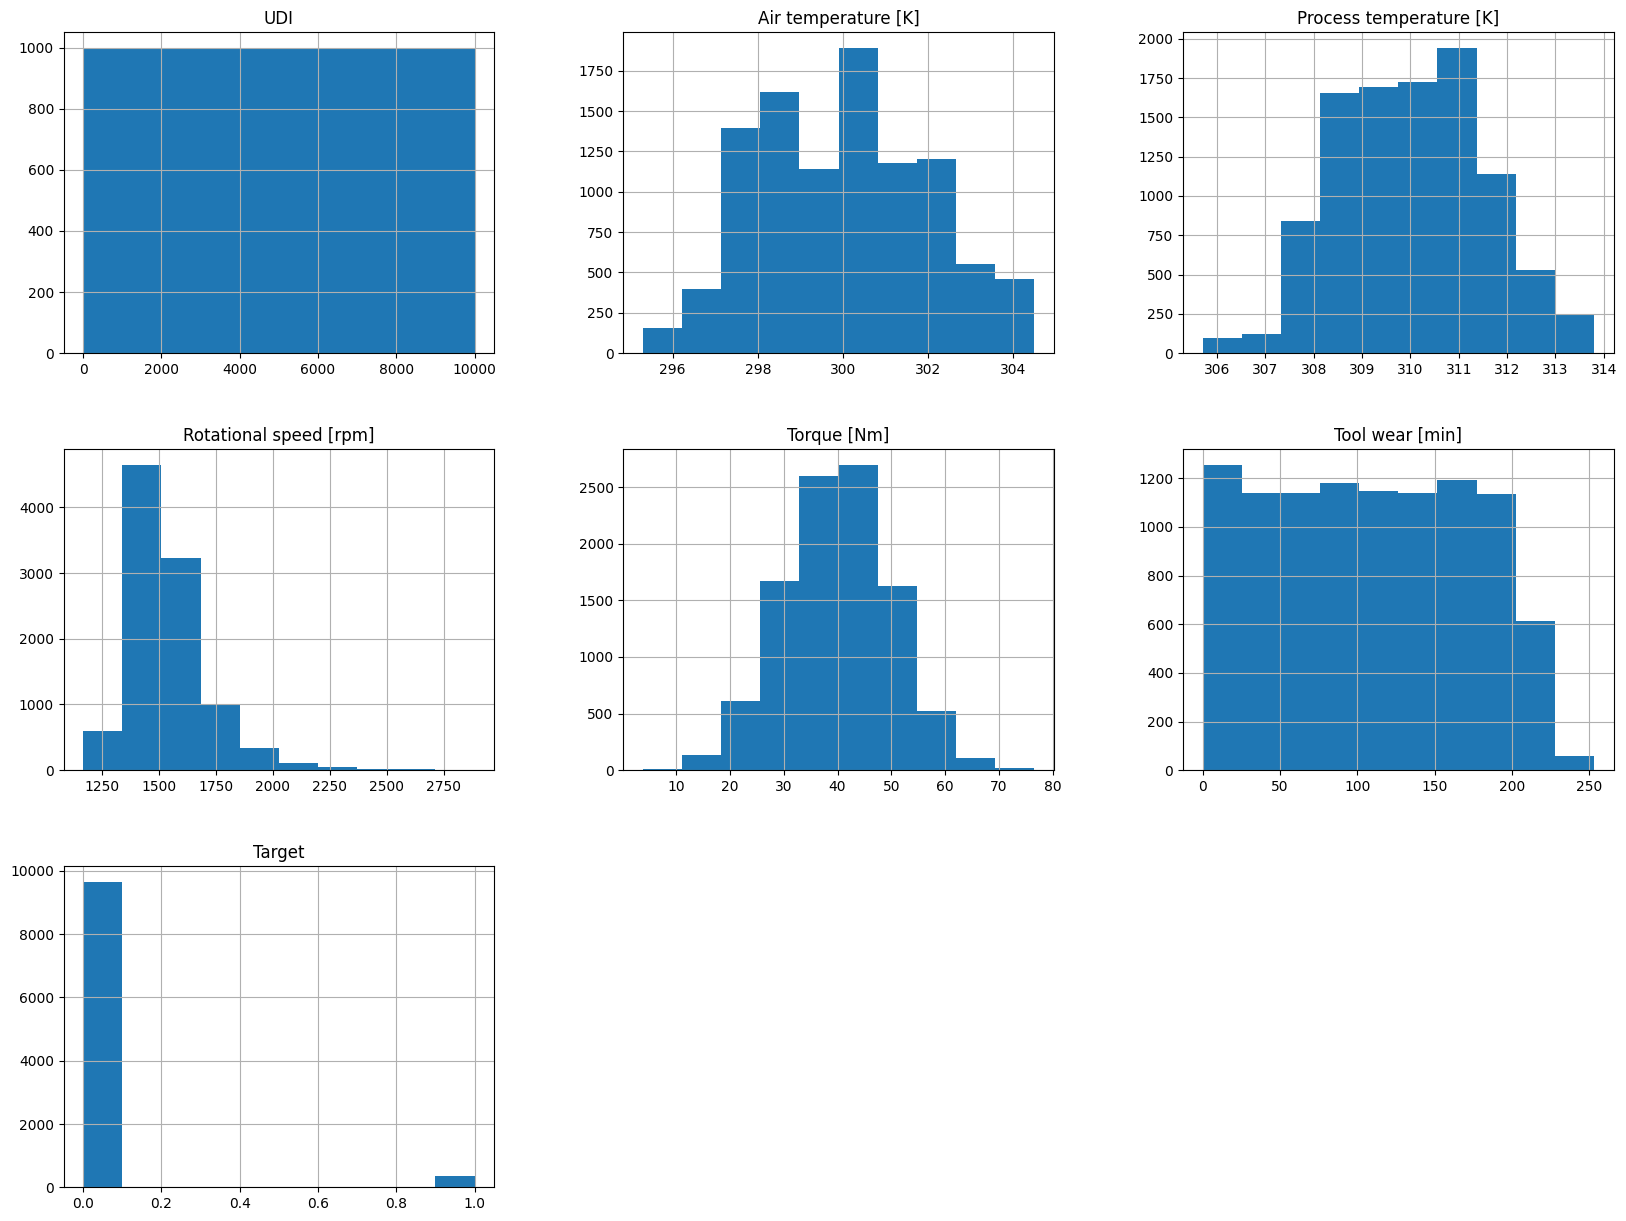

In [ ]:
df.hist(figsize=(20,15))

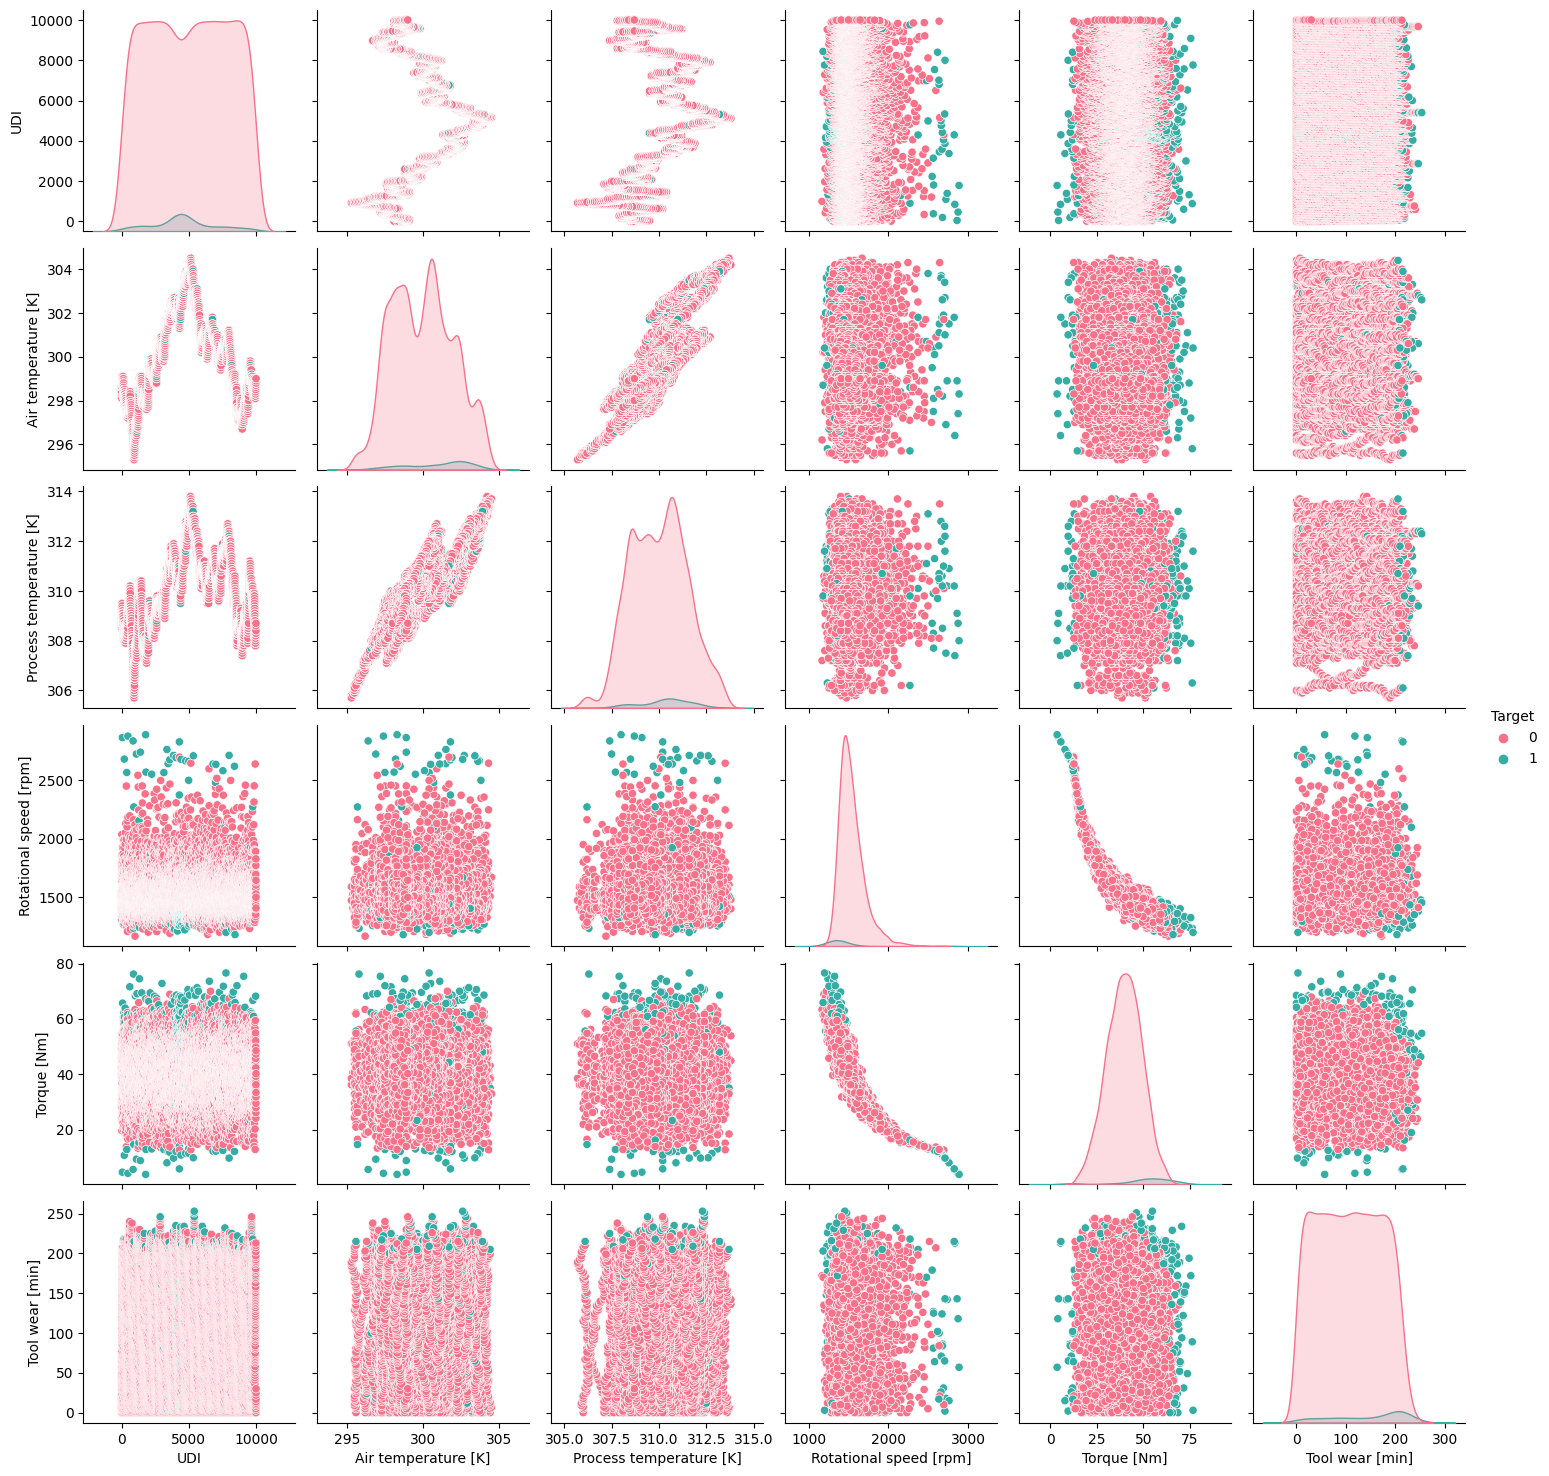

In [ ]:
sn.pairplot(df,hue="Target",palette="husl")

In [ ]:
##Importing resample from *sklearn.utils* package.
from sklearn.utils import resample

# Separate the case of 0 and 1
no_failure_0 = df[df.Target==0]
failure_1 = df[df.Target==1]

##Upsample the failuer(1) cases.
df_minority_upsampled = resample(failure_1,replace=True,n_samples=2000)

# Combine majority class with upsampled minority class
new_df = pd.concat([no_failure_0, df_minority_upsampled])

In [ ]:
from sklearn.utils import shuffle
shuffle_df = shuffle(new_df)

In [ ]:
shuffle_df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
4935,4936,L52115,L,303.4,312.3,1479,42.8,92,0,No Failure
9481,9482,L56661,L,298.9,309.6,1365,50.9,183,0,No Failure
7652,7653,L54832,L,300.3,311.4,1346,51.1,147,0,No Failure
3169,3170,M18029,M,300.4,309.6,1675,35.5,164,0,No Failure
9644,9645,L56824,L,299.3,310.4,1629,32.6,177,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
5154,5155,L52334,L,304.2,313.4,1568,37.6,25,0,No Failure
3962,3963,L51142,L,302.4,311.5,1785,24.8,45,0,No Failure
6123,6124,L53303,L,300.9,310.9,1477,41.5,100,0,No Failure
6186,6187,M21046,M,301.1,311.0,1413,46.6,30,0,No Failure


In [ ]:
shuffle_df.Target.value_counts()

Target
0    9652
1    2000
Name: count, dtype: int64

In [ ]:
shuffle_df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [ ]:
shuffle_df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     641
Power Failure                546
Overstrain Failure           462
Tool Wear Failure            265
Random Failures               86
Name: count, dtype: int64

In [ ]:
shuffle_df.Type.value_counts()

Type
L    7156
M    3372
H    1124
Name: count, dtype: int64

<Axes: xlabel='Rotational speed [rpm]', ylabel='Torque [Nm]'>

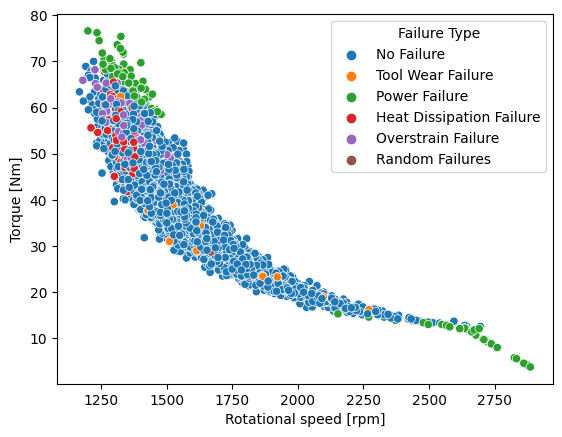

In [ ]:
sn.scatterplot(data=shuffle_df, x=shuffle_df['Rotational speed [rpm]'],y=shuffle_df['Torque [Nm]'],hue="Failure Type",palette="tab10")

<Axes: xlabel='Rotational speed [rpm]', ylabel='Torque [Nm]'>

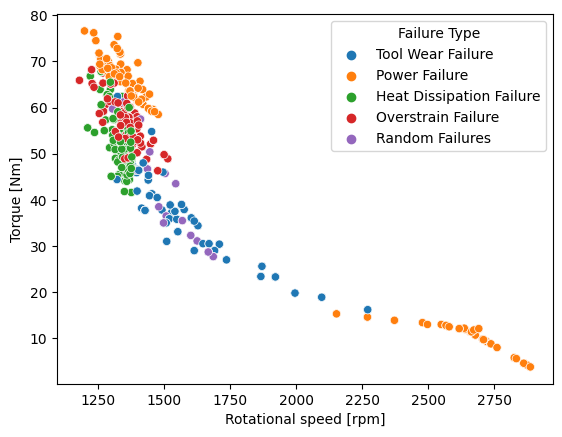

In [ ]:
subset_df = shuffle_df[shuffle_df["Target"] == 1].reset_index(drop=True)
sn.scatterplot(data=subset_df, x=subset_df['Rotational speed [rpm]'],y=subset_df['Torque [Nm]'],hue="Failure Type",palette="tab10")

/tmp/ipykernel_48/1621668466.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sn.scatterplot(data=subset_df, x=subset_df['Tool wear [min]'],y=subset_df['Failure Type'],palette="tab10")


<Axes: xlabel='Tool wear [min]', ylabel='Failure Type'>

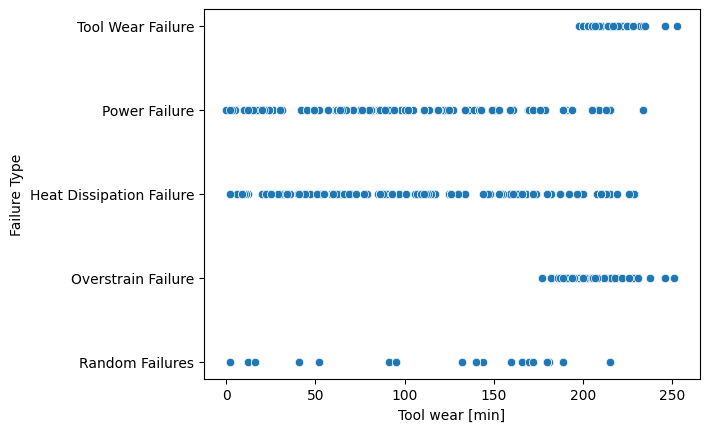

In [ ]:
sn.scatterplot(data=subset_df, x=subset_df['Tool wear [min]'],y=subset_df['Failure Type'],palette="tab10")

/tmp/ipykernel_48/988469026.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sn.scatterplot(data=subset_df, x=subset_df['Process temperature [K]'],y=subset_df['Failure Type'],palette="tab10")


<Axes: xlabel='Process temperature [K]', ylabel='Failure Type'>

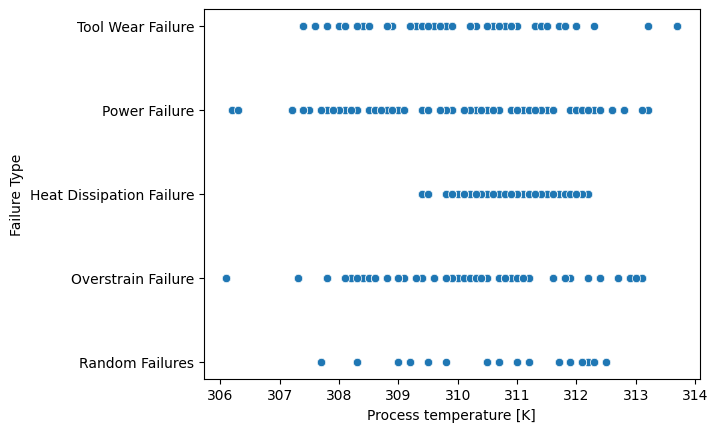

In [ ]:
sn.scatterplot(data=subset_df, x=subset_df['Process temperature [K]'],y=subset_df['Failure Type'],palette="tab10")

In [ ]:
# I droped Product ID here because in my analysis Product Id is not having that much feature importance
# also by encoding it possibility of causing very high cardinility so i drop it
encodeded_df = pd.get_dummies(shuffle_df.drop(["Product ID",'Target', 'Failure Type'],axis=1),drop_first=True)


In [ ]:
label_1=shuffle_df['Target']
label_2 = shuffle_df["Failure Type"]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(encodeded_df)

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(scaled,label_1,test_size=0.2, random_state=42)

## Building Logistics model

In [ ]:
from sklearn.linear_model import LogisticRegression
## Initializing the model
logit = LogisticRegression()
## Fitting the model with X and Y values of the dataset
logit.fit(train_X , train_y)

LogisticRegression()

In [ ]:
from sklearn.model_selection import cross_val_predict
y_trained_pred = cross_val_predict(logit,train_X,train_y)

In [ ]:
y_trained_prob = cross_val_predict(logit,train_X,train_y,method="predict_proba")

In [ ]:
## Importing the metrics
from sklearn import metrics
## Defining the matrix to draw the confusion matrix from actual and
## predicted class labels
def draw_cm( actual, predicted ):
    # Invoking confusion_matrix from metric package. The matrix
    # will be oriented as [1,0] i.e. the classes with label 1 will be
    # represented by the first row and 0 as second row
    cm= metrics.confusion_matrix(actual,predicted)
    # Confusion will be plotted as heatmap for better visualization
    # The labels are configured to better interpretation from the plot
    sn.heatmap(cm, annot=True, fmt='.2f',xticklabels = ['No Failure', 'Failure'], yticklabels = ['No Failure', 'Failure'] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

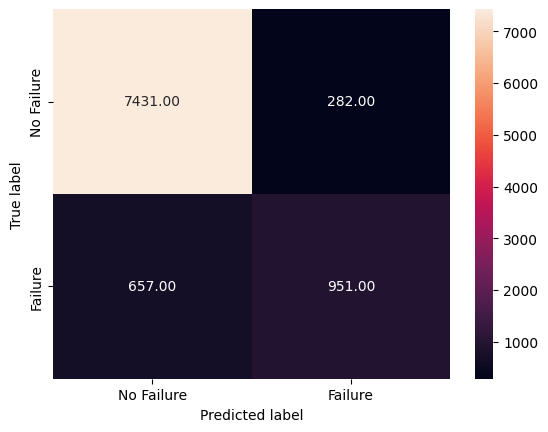

In [ ]:
draw_cm(train_y , y_trained_pred)

In [ ]:
print(metrics.classification_report(train_y , y_trained_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7713
           1       0.77      0.59      0.67      1608

    accuracy                           0.90      9321
   macro avg       0.85      0.78      0.81      9321
weighted avg       0.89      0.90      0.89      9321



In [ ]:
y_trained_score = y_trained_prob[:,1]
fpr,tpr,threshold = metrics.roc_curve(train_y,y_trained_score)

In [ ]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,linewidth=2)
    plt.plot([0,1],[0,1],"k--")
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.grid(True)
    plt.figure(figsize=(8, 6))
    plt.show()

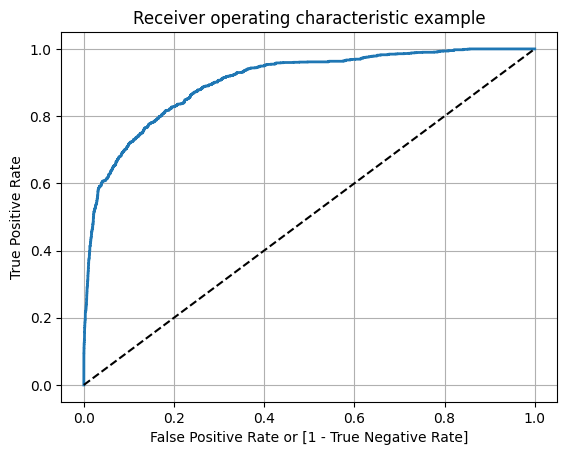

<Figure size 800x600 with 0 Axes>

In [ ]:
plot_roc_curve(fpr,tpr)

In [ ]:
metrics.roc_auc_score(train_y,y_trained_score)

0.9035868079542646

## Building Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_X , train_y)

DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import cross_val_predict
tree_pred = cross_val_predict(dec_tree,train_X,train_y)
tree_prob = cross_val_predict(dec_tree,train_X,train_y,method="predict_proba")
tree_score = tree_prob[:,1]

In [ ]:
from sklearn.metrics import precision_score , recall_score , confusion_matrix

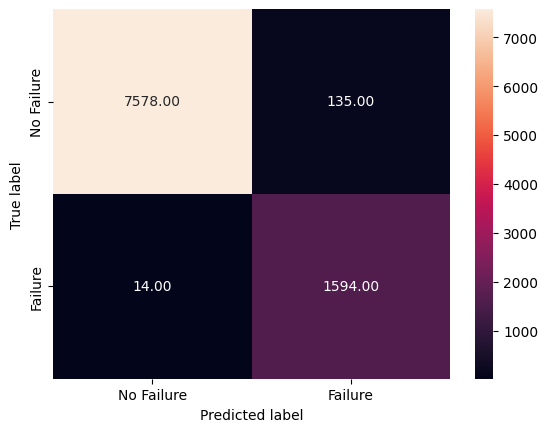

In [ ]:
draw_cm(train_y,tree_pred)

In [ ]:
tree_fpr , tree_tpr , thrshold = metrics.roc_curve(train_y,tree_score)

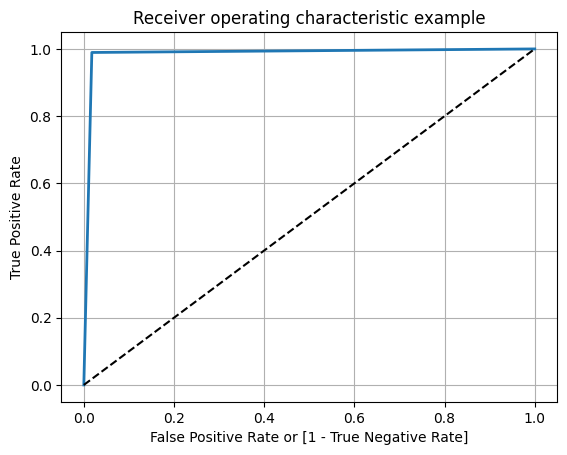

<Figure size 800x600 with 0 Axes>

In [ ]:
plot_roc_curve(tree_fpr,tree_tpr)

In [ ]:
metrics.roc_auc_score(train_y,tree_score)

0.9858328205336601

## Building Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(max_depth=25,n_estimators=40)

In [ ]:
random_clf.fit(train_X,train_y)

RandomForestClassifier(max_depth=25, n_estimators=40)

In [ ]:
from sklearn.model_selection import cross_val_predict,cross_val_score
random_clf_pred = cross_val_predict(random_clf,train_X,train_y)
random_clf_prob = cross_val_predict(random_clf,train_X,train_y,method="predict_proba")
random_clf_score = random_clf_prob[:,1]

In [ ]:
from sklearn.metrics import precision_score,recall_score,precision_recall_curve
precision,recall,threshold = precision_recall_curve(train_y,random_clf_score)

In [ ]:
def precision_recall_curve_VS_threshold(Precision,recall,threshold):
    plt.plot(threshold,precision[:-1],"b--",label="precision")
    plt.plot(threshold,recall[:-1],"g--",label="recall")
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title('precision_recall_curve VS threshold')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.figure(figsize=(8, 6))
    plt.show()

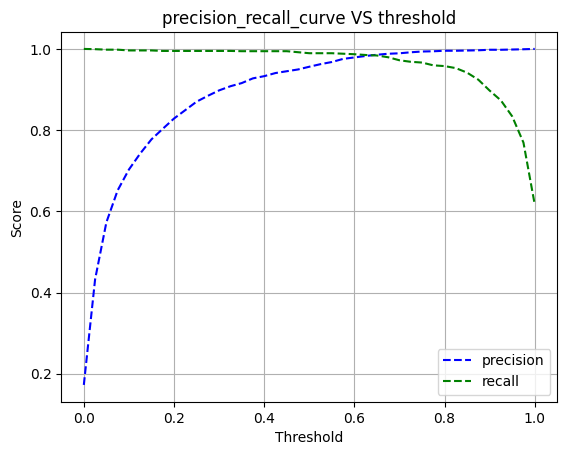

<Figure size 800x600 with 0 Axes>

In [ ]:
precision_recall_curve_VS_threshold(precision,recall,threshold)

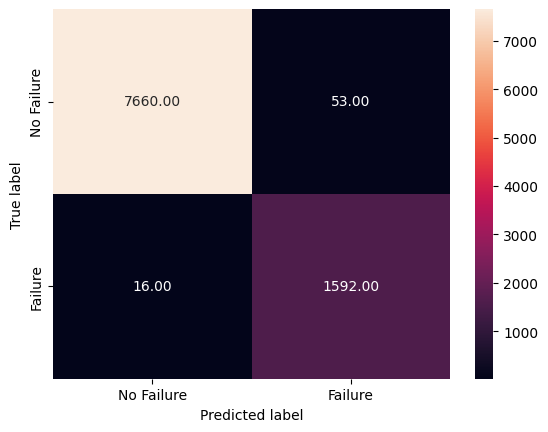

In [ ]:
draw_cm(train_y,random_clf_pred)

In [ ]:
feature_rank = pd.DataFrame( { 'feature': encodeded_df.columns,'importance': random_clf.feature_importances_ } )
feature_rank[feature_rank["importance"]>0.01].sort_values('importance', ascending = False)
# feature_rank.head(10)
# feature_rank[feature_rank["importance"]>0.05]
# plt.figure(figsize=(18, 16))
# sn.barplot( y = 'feature', x =features_ ,data = feature_rank );

,feature,importance
4,Torque [Nm],0.280369
3,Rotational speed [rpm],0.270493
5,Tool wear [min],0.170287
0,UDI,0.102413
1,Air temperature [K],0.089973
2,Process temperature [K],0.071386


In [ ]:
feature_rank['cumsum'] = feature_rank.importance.cumsum() * 100
feature_rank.iloc[: , :]

,feature,importance,cumsum
0,UDI,0.102413,10.241310
1,Air temperature [K],0.089973,19.238573
2,Process temperature [K],0.071386,26.377155
3,Rotational speed [rpm],0.270493,53.426424
4,Torque [Nm],0.280369,81.463358
5,Tool wear [min],0.170287,98.492067
6,Type_L,0.007853,99.277411
7,Type_M,0.007226,100.000000


In [ ]:
from sklearn.model_selection import GridSearchCV
## Configuring parameters and values for searched
tuned_parameters = [{'max_depth': [5,10, 15,20,25,30],'n_estimators': [25,30,35,40,45,50]}]
## Configuring search with the tunable parameters
clf = GridSearchCV(random_clf,tuned_parameters, cv=5, scoring='roc_auc')
## Fitting the training set
clf.fit(train_X, train_y)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=25, n_estimators=40),
             param_grid=[{'max_depth': [5, 10, 15, 20, 25, 30],
                          'n_estimators': [25, 30, 35, 40, 45, 50]}],
             scoring='roc_auc')

In [ ]:
clf.best_score_

0.999172582345253

In [ ]:
clf.best_params_

{'max_depth': 15, 'n_estimators': 45}

In [ ]:
## Testing Model on test data

## TESTING

As we are testing our model on test set we dont want to fit model to test set so we just used predict method on best parameter and best alogorithm

best Algorithm : Random Forest

In [ ]:
pred = random_clf.predict(test_X)

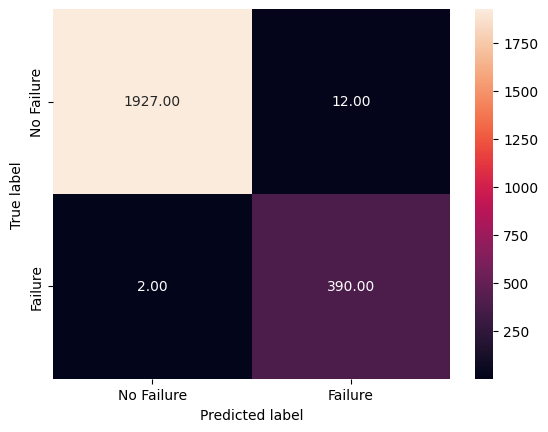

In [ ]:
draw_cm(test_y,pred)

### model is working well only 3 miss classified values which are harmfull

